## Final Project Submission

Please fill out:
* Student name: Sylvia Muthoni Kamau
* Student pace: self paced / part time / full time - part time
* Scheduled project review date/time: 26-7-2024
* Instructor name: Samwel Jane
* Blog post URL:https://github.com/muthonirocks/dsc-phase-1-project/


       genres  domestic_gross  foreign_gross  averagerating       numvotes
17     Sci-Fi    1.100435e+08   2.060113e+08       6.448175  244164.029197
1   Adventure    9.587133e+07   2.090895e+08       6.488222  157428.671111
2   Animation    8.913107e+07   1.992177e+08       6.716250   86278.412500
0      Action    5.920184e+07   1.423355e+08       6.279821  120794.198804
9     Fantasy    5.642761e+07   1.442354e+08       6.250282  108901.627119
8      Family    5.057264e+07   1.007953e+08       6.195935   52956.333333
18      Sport    3.917411e+07   6.624579e+07       6.879630   51898.370370
4      Comedy    3.397734e+07   7.357337e+07       6.247040   58584.700935
13    Musical    3.058807e+07   7.411853e+07       6.316667   27031.222222
19   Thriller    2.976079e+07   7.143593e+07       6.162554   77234.015152


ValueError: cannot reindex on an axis with duplicate labels

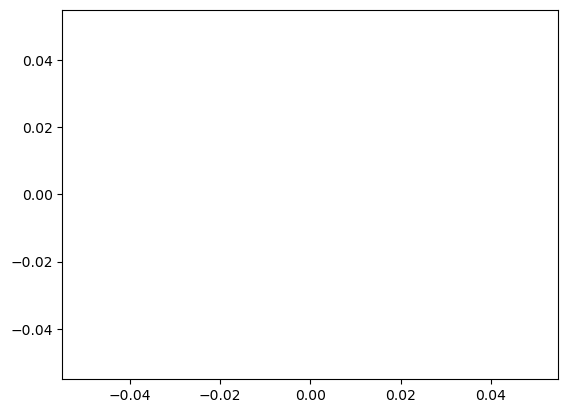

In [16]:


# Import necessary libraries
import pandas as pd
import os
import zipfile

# Unzip the data file 
zip_file_path = 'zippedData.zip'
extraction_path = 'zippedData/'

if not os.path.exists(extraction_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)

# Load the datasets
title_basics_path = os.path.join(extraction_path, 'imdb.title.basics.csv.gz')
title_ratings_path = os.path.join(extraction_path, 'imdb.title.ratings.csv.gz')
movie_gross_path = os.path.join(extraction_path, 'bom.movie_gross.csv.gz')

title_basics = pd.read_csv(title_basics_path)
title_ratings = pd.read_csv(title_ratings_path)
movie_gross = pd.read_csv(movie_gross_path)

# Merge the datasets
title_basics['primary_title_lower'] = title_basics['primary_title'].str.lower()
movie_gross['title_lower'] = movie_gross['title'].str.lower()

merged_data = pd.merge(movie_gross, title_basics, left_on='title_lower', right_on='primary_title_lower', how='inner')
final_merged_data = pd.merge(merged_data, title_ratings, on='tconst', how='inner')

# Save the merged dataset for future reference
final_merged_data.to_csv('final_merged_data.csv', index=False)

# Analysis
# Split genres into separate rows
genre_data = final_merged_data.copy()
genre_data['genres'] = genre_data['genres'].str.split(',')
genre_data = genre_data.explode('genres')

# Convert foreign_gross to numeric, handle non-numeric gracefully
genre_data['foreign_gross'] = pd.to_numeric(genre_data['foreign_gross'].str.replace(',', ''), errors='coerce')

# Group by genre and calculate the average domestic and foreign gross
average_gross_by_genre = genre_data.groupby('genres').agg({
    'domestic_gross': 'mean',
    'foreign_gross': 'mean',
    'averagerating': 'mean',
    'numvotes': 'mean'
}).reset_index()

# Sort by average domestic gross in descending order
average_gross_by_genre = average_gross_by_genre.sort_values(by='domestic_gross', ascending=False)

# Display the top 10 genres by average domestic gross
print(average_gross_by_genre.head(10))

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation between average rating and domestic gross
sns.scatterplot(data=genre_data, x='averagerating', y='domestic_gross')
plt.title('Correlation between Average Rating and Domestic Gross')
plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross')
plt.show()

# Identify the top-performing genres by average domestic gross
top_genres = average_gross_by_genre.head(10)
print(top_genres)



